# Titanic Dataset

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
train = pd.read_csv(r'C:\Users\Abhay Thakur\Downloads\python\titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing Data

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train.shape

(891, 12)

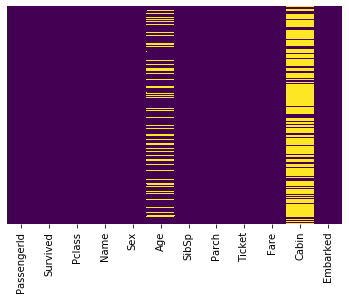

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

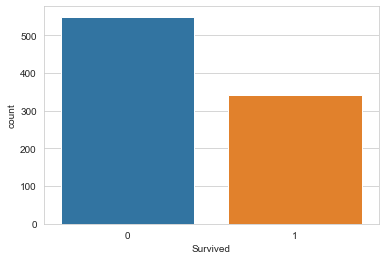

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train )

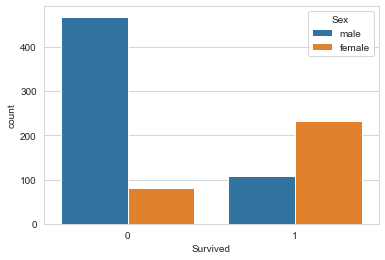

In [13]:
sns.countplot(x='Survived',hue='Sex',data=train)

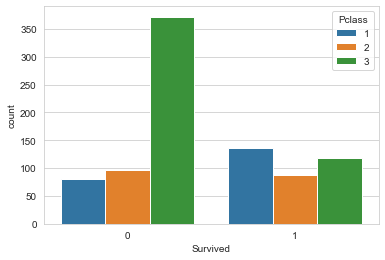

In [14]:
sns.countplot(x='Survived',hue='Pclass',data=train)

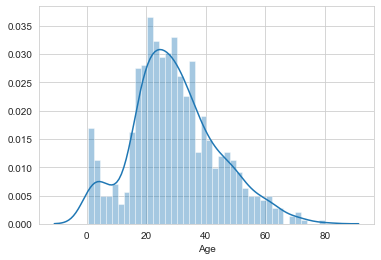

In [17]:
sns.distplot(train['Age'].dropna(),bins=40)

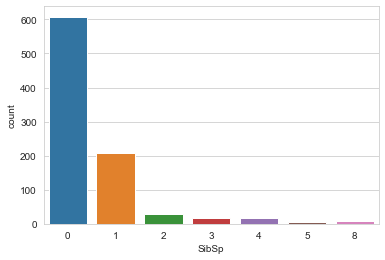

In [18]:
sns.countplot(x='SibSp',data=train)

## Data Cleaning

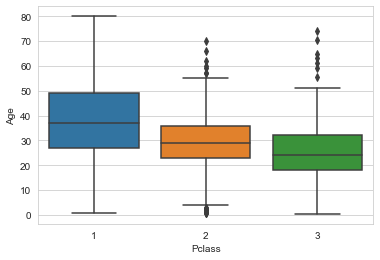

In [19]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [23]:
 def input_age(cols):
        Age=cols[0]
        Pclass = [1]
        
        if pd.isnull(Age):
            if Pclass == 1:
                return 37
            elif Pclass ==2:
                return 29
            else:
                return 24
        else:
            return Age

In [24]:
train['Age'] = train[['Age','Pclass']].apply(input_age, axis =1)

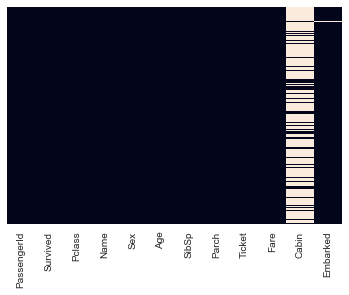

In [25]:
sns.heatmap(train.isnull(),yticklabels =False , cbar= False)

In [26]:
train.drop('Cabin',axis = 1, inplace = True)

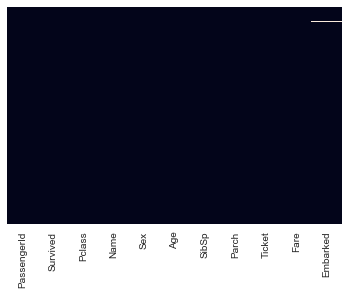

In [27]:
sns.heatmap(train.isnull(),yticklabels =False , cbar= False)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [30]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [33]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [35]:
train = pd.concat([train,sex,embark],axis=1)

In [36]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Model builduing

### Logistic Regression

In [70]:
X = train.drop('Survived',axis=1)

In [71]:
y = train['Survived']

In [51]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=101)

### Training and prediction

In [57]:
from sklearn.linear_model import LogisticRegression 

In [68]:
logmodel = LogisticRegression(max_iter=1000)


In [73]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
predictions = logmodel.predict(X_test)

In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
accuracy=confusion_matrix(y_test,predictions)

In [82]:
accuracy

array([[135,  19],
       [ 39,  75]], dtype=int64)

In [85]:
from sklearn.metrics import accuracy_score

In [86]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7835820895522388